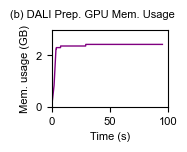

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.stats import pearsonr

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

title_font_size = 8
tick_font_size = 8
label_size = 8

plt.rcParams["font.family"] = "Arial"

linewidth=1


all_times = []
all_batches = []
filename = 'mem-b64-t4.txt'
legends = ['ResNet50-P100']
colors = ['blue']
columns = ['timestamp', 'mem']


with open(filename) as f:
	df = pd.read_csv(filename, delimiter='\t', names=columns)
	df['mem'] = df['mem'] / 2 ** 30
	mem_all = df['mem'].to_list()

	timestamp = df['timestamp'].to_list()
	firsttime = timestamp[0]
	timestamp = [x-firsttime for x in timestamp]
		

# print(batches)
# print(times)

figure, axes = plt.subplots()
# axes.set_aspect( 1.1 )
x_range = [0,100]
y_range = [0,3]
axes.set_xlim(x_range)
axes.set_ylim(y_range)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)

	# plt.plot(all_batches[i], all_times[i], linewidth=linewidth, label=legends[i], color=colors[i])
plt.plot(timestamp, mem_all, linewidth=1, color='purple')

plt.xlabel('Time (s)', fontsize=title_font_size)
plt.ylabel('Mem. usage (GB)', fontsize=title_font_size)
plt.title('(b) DALI Prep. GPU Mem. Usage',  fontsize=title_font_size, y=1.05, x=0.35)
# Time v.s. Batch Size

# Calculate Pearson correlation coefficient


# plt.legend(fontsize=label_size, markerfirst=False, borderpad=0.2, loc='upper left')
figure.set_size_inches(1.5, 1)
figure.set_dpi(100)
plt.savefig('mem.eps', bbox_inches='tight', transparent=True)

plt.show()